# 2. 군집 분석

## 2.1 분할 군집 분석

### 2.1.1. K-평균 군집 분석

In [1]:
import pandas as pd
from konlpy.tag import Hannanum  # 한나눔 형태소 분석기 사용
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [2]:
hannanum = Hannanum()

#### '유한양행', '라돈', '복면가왕 왕밤빵'을 검색 키워드로 각 키워드당 기사 5개씩 추출

In [3]:
Data = pd.read_csv("D:\\취임연설문\\군집분석데이터.csv", engine = "python")

In [4]:
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [5]:
docs = []

for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))  # 한나눔 형태소 분석기로 명사만 추출

In [6]:
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])  # 추출된 명사들을 띄어쓰기로 붙여서 열거

In [7]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [8]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [42]:
kmeans = KMeans(n_clusters = 3).fit(df)

In [43]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

#### ※ PCA(주성분 분석) - 차원 축소 : 여러 개의 변수를 혼합하여 설명력 높은 새로운 소수의 변수를 생성해내는 기법

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])

In [13]:
principalDf.index = Data['검색어']

In [14]:
principalDf

,principal component 1,principal component 2
검색어,,
유한양행,-2.245409,-4.167453
유한양행,-3.613943,-9.898584
유한양행,-2.932637,-7.159358
유한양행,-2.142777,-3.757108
유한양행,-3.397886,-8.904281
라돈,-3.456161,0.931166
라돈,-4.172639,2.527029
라돈,-6.418891,7.240862
라돈,-7.928540,10.011249


#### ※ 시각화

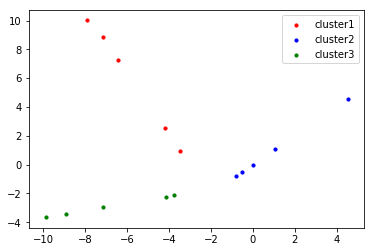

In [15]:
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 1], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 1], principalDf.iloc[kmeans.labels_ == 2, 0], s = 10, c = 'green', label = 'cluster3')
plt.legend()

### 2.1.2. k-대푯값 군집 분석

In [16]:
!pip install pyclustering

  Stored in directory: C:\Users\SOJINSOO\AppData\Local\pip\Cache\wheels\cd\ba\70\aa5549e7b36f4a06458e560e727f87503f9f6cf07568c4b2c7
Successfully built pyclustering


In [17]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

In [18]:
hannanum = Hannanum()

In [20]:
Data = pd.read_csv('D:\\취임연설문\\군집분석데이터.csv', engine = "python")

In [21]:
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [22]:
docs = []

for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

In [23]:
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [24]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [25]:
kmedoids_instance = kmedoids.kmedoids(df.as_matrix(), initial_index_medoids = np.random.randint(15, size = 3))  # 초기 대표 오브젝트 설정

C:\Users\SOJINSOO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [26]:
kmedoids_instance.process()

In [40]:
clusters = kmedoids_instance.get_clusters()

In [41]:
clusters

[[0, 1, 2, 3, 4, 5, 6], [8, 7, 9], [13, 10, 11, 12, 14]]

## 2.2. 구조적 군집 분석

### 2.2.1. 거리 측정법

- 최소 거리
- 최대 거리
- 평균 거리
- 거리 평균
- Ward

In [29]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering  # 구조적 군집 분석 패키지
import scipy.cluster.hierarchy as shc  # 트리 형태(덴드로다이어그램) 시각화

In [30]:
hannanum = Hannanum()

In [32]:
Data = pd.read_csv("D:\\취임연설문\\군집분석데이터.csv", engine = "python")

In [33]:
Data.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [34]:
docs = []

for i in Data['기사내용']:
    docs.append(hannanum.nouns(i))

In [35]:
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [36]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [37]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

In [44]:
cluster = AgglomerativeClustering(n_clusters = 3, linkage = "ward")  # 클러스터 수 = 3,연결 측정법을 Ward로 설정하여 분석 수행
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

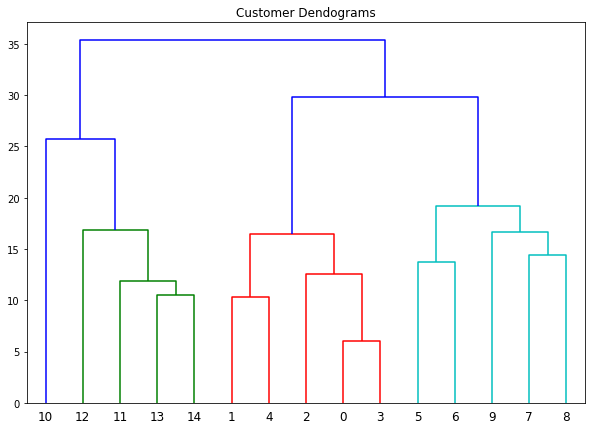

In [45]:
plt.figure(figsize = (10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method = "ward"))